## Purpose: 

Find the correct genome version for Gagneur et al 2013 growthQTL. liftOver coordinates to most recent genome (V64_2011_02_03) 

In [42]:
library(rtracklayer);
library(VariantAnnotation);
library(parallel);

In [43]:
# read in gene coordinates from Gagneur et al 2013 
gagneur_gene_coords = read.table("../data/journal.pgen.1003803.s017.TXT", sep = "\t", header = T)

In [44]:
head(gagneur_gene_coords)

,chrom,start,end,strand,name,commonName,type,source,novel
1,chr01,6601,9080,+,SY_A0001W,SY_A0001W,SUT,genenv,TRUE
2,chr01,9392,9954,+,SUT001,SUT001,SUT,XU09,FALSE
3,chr01,11378,11715,+,SY_A0003W,SY_A0003W,SUT,genenv,TRUE
4,chr01,28205,28501,+,SY_A0004W,SY_A0004W,SUT,genenv,TRUE
5,chr01,29136,29934,+,SY_A0005W,SY_A0005W,SUT,genenv,TRUE
6,chr01,31860,32320,+,YAL062W,GDH3,ORF-T,XU09,FALSE


In [123]:
# load current gene coords
load("/g/steinmetz/project/GenPhen/data/external_data/Xu_2009/txGR.rda")
# make into data.frame
zu_gene_coords = data.frame(chrom=as.character(seqnames(txGR)),start=start(ranges(txGR)),
                            end=end(ranges(txGR)),ID = mcols(txGR)$ID, Name = mcols(txGR)$Name)
#
# NOTE
#
# These gene coordinates are not consistent with SGD coords bc they are transcript boundaries
#
head(zu_gene_coords)


,chrom,start,end,ID,Name
1,chr01,10732,11140,ST3636,CUT436
2,chr01,30072,30904,ST0002,CUT001
3,chr01,30532,30892,ST3638,CUT437
4,chr01,34380,34748,ST3641,CUT438
5,chr01,35796,36348,ST3642,CUT439
6,chr01,67850,67962,ST3652,CUT440


In [113]:
# load current gene coords
sgd_gff = import.gff("~/Documents/git/steinmetz-lab/CRISPR/data/saccharomyces_cerevisiae.gff")
# sgd_gene_coords = data.frame(chrom=as.character(seqnames(sgd_gff)),start=start(ranges(sgd_gff)),
#                             end=end(ranges(sgd_gff)), Name = mcols(sgd_gff)$Name, 
#                             Alias = mcols(sgd_gff)$Alias, gene = mcols(sgd_gff)$gene)

sgd_gene_coords = data.frame(chrom=as.character(seqnames(sgd_gff)),start=start(ranges(sgd_gff)),
    end=end(ranges(sgd_gff)), Name = mcols(sgd_gff)$Name,gene = mcols(sgd_gff)$gene)
head(sgd_gene_coords)

,chrom,start,end,Name,gene
1,chrI,1,230218,chrI,NA
2,chrI,1,801,TEL01L,NA
3,chrI,337,801,TEL01L_X_element,NA
4,chrI,63,336,TEL01L_X_element_combinatorial_repeat,NA
5,chrI,1,62,TEL01L_telomeric_repeat,NA
6,chrI,335,649,YAL069W,NA


In [47]:
# restrict both gene sets to make common reference set
common_genes_sgd = sgd_gene_coords$gene[which(sgd_gene_coords$gene %in% gagneur_gene_coords$commonName)]
common_genes_zu = zu_gene_coords$Name[which(zu_gene_coords$Name %in% gagneur_gene_coords$name)]

# find genes that occur more than once in gagneur set
toExclude_sgd = c(names(which(table(unlist(gagneur_gene_coords[,"commonName"]))>1,useNames = T)),
              names(which(table(unlist(sgd_gene_coords[,"gene"]))>1,useNames = T)))
common_genes_sgd = setdiff(common_genes_sgd,toExclude_sgd)
toExclude_zu = c(names(which(table(unlist(gagneur_gene_coords[,"name"]))>1,useNames = T)),
              names(which(table(unlist(zu_gene_coords[,"Name"]))>1,useNames = T)))
common_genes_zu = setdiff(common_genes_zu,toExclude_zu)

gagneur_gene_coords_zu = subset(gagneur_gene_coords, name %in% common_genes_zu)
gagneur_gene_coords_sgd = subset(gagneur_gene_coords, commonName %in% common_genes_sgd)
sgd_gene_coords = subset(sgd_gene_coords, gene %in% common_genes_sgd)
zu_gene_coords = subset(zu_gene_coords, Name %in% common_genes_zu)

In [48]:
dim(gagneur_gene_coords_zu)
dim(zu_gene_coords)
dim(gagneur_gene_coords_sgd)
dim(sgd_gene_coords)

[1] 5853    9

[1] 5853    5

[1] 4570    9

[1] 4570    5

In [49]:
# combine gene coords
combined_gene_coords_sgd = merge(gagneur_gene_coords, sgd_gene_coords, by.x = "commonName", by.y = "gene")
combined_gene_coords_zu = merge(gagneur_gene_coords, zu_gene_coords, by.x = "name", by.y = "Name")

In [50]:
head(combined_gene_coords_zu)

,name,chrom.x,start.x,end.x,strand,commonName,type,source,novel,chrom.y,start.y,end.y,ID
1,CUT006,chr02,96596,98332,+,CUT006,CUT,XU09,FALSE,chr02,96352,96568,ST0064
2,CUT014,chr02,324730,325644,+,CUT014,CUT,XU09,FALSE,chr02,324513,325361,ST0128
3,CUT016,chr02,339934,341200,+,CUT016,CUT,XU09,FALSE,chr02,339602,339946,ST0132
4,CUT023,chr02,381736,382288,+,CUT023,CUT,XU09,FALSE,chr02,381378,381642,ST0146
5,CUT025,chr02,436333,438133,+,CUT025,CUT,XU09,FALSE,chr02,429669,431781,ST0156
6,CUT027,chr02,499590,500238,+,CUT027,CUT,XU09,FALSE,chr02,493094,493686,ST0174


In [124]:
subset(sgd_gene_coords,Name== "YAL062W")
subset(zu_gene_coords,Name== "YAL062W")
subset(gagneur_gene_coords,name== "YAL062W")


,chrom,start,end,Name,gene
48,chrI,31567,32940,YAL062W,GDH3


,chrom,start,end,ID,Name
927,chr01,31152,32984,ST0003,YAL062W


,chrom,start,end,strand,name,commonName,type,source,novel
6,chr01,31860,32320,+,YAL062W,GDH3,ORF-T,XU09,FALSE
7,chr01,32340,33710,+,YAL062W,GDH3,ORF-T,SGD,FALSE


In [51]:
fs = system("ls -d -1 ~/Documents/steinmetz_local/yeast/genomes/liftover/*.chain", inter = T)
head(fs)

[1] "/Users/brooks/Documents/steinmetz_local/yeast/genomes/liftover/V01_1996_07_31_V64_2011_02_03.over.chain"
[2] "/Users/brooks/Documents/steinmetz_local/yeast/genomes/liftover/V02_1997_07_27_V64_2011_02_03.over.chain"
[3] "/Users/brooks/Documents/steinmetz_local/yeast/genomes/liftover/V03_1997_07_30_V64_2011_02_03.over.chain"
[4] "/Users/brooks/Documents/steinmetz_local/yeast/genomes/liftover/V04_1997_08_11_V64_2011_02_03.over.chain"
[5] "/Users/brooks/Documents/steinmetz_local/yeast/genomes/liftover/V05_1998_05_21_V64_2011_02_03.over.chain"
[6] "/Users/brooks/Documents/steinmetz_local/yeast/genomes/liftover/V06_1998_09_13_V64_2011_02_03.over.chain"

The liftOver chain files from SGD have this realy annoying feature that the chromosomes within each file AND between every chromosome within a file have different names. Each chromosme has a weird data extension to its name - but it's impossible to predict what the extension will be. This sucks b/c liftOver will not map if the chr name isn't correct. 

To solve the problem I will go through each chain file and remove the trailing date from the chr name. 

In [52]:
# rename all chrs names within all chain files
# for (i in fs) {
#     fin = readLines(i)
#     for (x in seq(1,length(fin))) {
#         if (grepl("^chain",fin[x])) {
#             ls = strsplit(fin[x],split = " ")[[1]]
#             ls[3] = strsplit(ls[3],split="_")[[1]][1]
#             ls[8] = strsplit(ls[8],split="_")[[1]][1]
#             fin[x] = paste(ls,collapse=" ")
#         }
#     }
#     writeLines(fin,con = i,sep = "\n")
# }
# DONE AB 2/23/2016. Shouldn't be a problem anymore

In [66]:
perfomLiftOver = function(combined_df, chain) {
    # expects df to include three columns, chrom, start, end, name, commonName
    # chrom.x, start.x, end.x should correspond to input coords (coords to liftOver)
    
    # open chain file to see what the name of chrs should be
    # assumes these names are in the 3rd line, positions 3 and 8
    chainData = strsplit(readLines(chain)[3], split = " ")[[1]]
    chr1 = paste(strsplit(chainData[3], split = "_")[[1]][-1], collapse = "_")
    chr1_format = gsub("^chr","",strsplit(chainData[3], split = "_")[[1]][1])
    if (length(grep("[0-9]",chr1_format)) == 0) {
        chr1_isroman = T
    } else {
        chr1_isroman = F
    }
    chr2 = paste(strsplit(chainData[8], split = "_")[[1]][-1], collapse = "_")
    chr2_format = gsub("^chr","",strsplit(chainData[8], split = "_")[[1]][1])
    if (length(grep("[0-9]",chr2_format)) == 0) {
        chr2_isroman = T
    } else {
        chr2_isroman = F
    }
    # modify chr1 names
    if (chr1_isroman == F) {
        if (nchar(chr1)>1) {
            tmp_chr_names = paste(combined_df[,"chrom.x"], chr1, sep = "_")
        } else {
            tmp_chr_names = combined_df[,"chrom.x"]
        }
        
    } else {
        # convert to roman 
        tmp_chr_names = sapply(gsub("^chr", "", combined_df[,"chrom.x"]),
                               function(i){paste("chr", as.roman(i), sep = "")})
    }
    # need write permission is current dir
    write.table(cbind(tmp_chr_names,combined_df[,c("start.x","end.x","name")]), 
                file="tmp_input.bed",quote = F,row.names = F,col.names = F,sep = " ")
    # run liftOver
    system(paste("liftOver tmp_input.bed", chain, "tmp_output.bed tmp_unlifted.bed",sep=" "))
    # read liftOver
    lift_coords = read.table("tmp_output.bed", sep = "\t", header = F)
    colnames(lift_coords) = c("chr","start","stop","gene")
    combined_df_2 = merge(combined_df, lift_coords, by.x = "commonName", by.y = "gene")
    # merge with combined_df1
    combined_df_2 = merge(combined_df, lift_coords, by.x = "name", by.y = "gene")
    score1 = (sum(combined_df_2$start.y == combined_df_2$start) 
             + sum(combined_df_2$stop.y == combined_df_2$stop))/(dim(combined_df_2)[1]*2)
    score2 = (sum(abs(combined_df_2$start.y - combined_df_2$start)) 
             + sum(abs(combined_df_2$stop.y - combined_df_2$stop)))/(dim(combined_df_2)[1]*2)
    o = list()
    o$scoreABS = score1
    o$scorePROX = score2
    o$df = combined_df_2
    return(o)
}

In [69]:
liftScores_sgd = lapply(fs,function(i){
    perfomLiftOver(combined_gene_coords_sgd,i)
})
names(liftScores_sgd) = fs
liftScores_zu = lapply(fs,function(i){
    perfomLiftOver(combined_gene_coords_zu,i)
})
names(liftScores_zu) = fs

character(0)

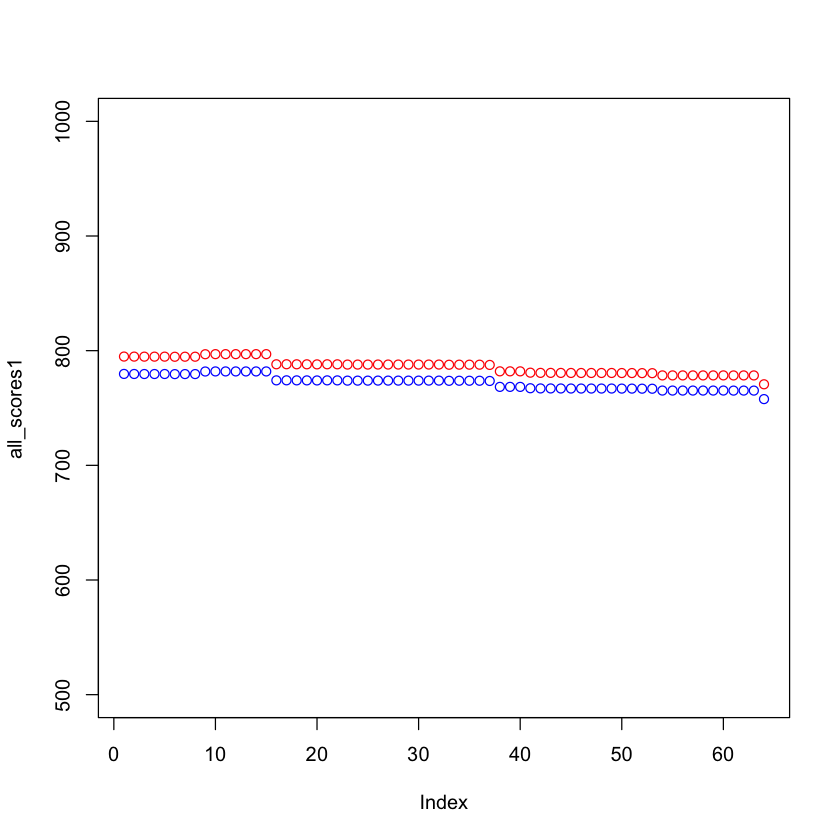

In [102]:
all_scores1 = unlist(sapply(liftScores_zu,function(i){i$scorePROX}))
all_scores2 = unlist(sapply(liftScores_sgd,function(i){i$scorePROX}))
plot(all_scores1, col = "red", ylim = c(500,1000))
points(all_scores2, col = "blue")
minf1 = which(all_scores==max(all_scores1))
minf2 = which(all_scores==max(all_scores2))
fs[minf1]

In [93]:
# load in QTL data
qtls = read.delim("../data/journal.pgen.1003803.s016.TXT",sep="\t",skip=5)
qtls = qtls[,c("chrom","start","stop")]
qtls = cbind(qtls,seq(1,dim(qtls)[1]),seq(1,dim(qtls)[1]))
# rename columns
colnames(qtls) = c("chrom.x", "start.x", "end.x", "name","commonName")
# add 1 to SNPs
qtls[which(qtls$start.x==qtls$end.x),"end.x"] = qtls[which(qtls$start.x==qtls$end.x),"end.x"] + 1

In [94]:
# convert QTL data
qtl_out = perfomLiftOver(qtls, fs[minf[1]])
# correct SNP coord change
qtl_out$df[which(qtl_out$df$end.x - qtl_out$df$start.x == 1),"stop"] = 
    qtl_out$df[which(qtl_out$df$end.x - qtl_out$df$start.x == 1),"start"]

In [96]:
qtl_out$df

,name,chrom.x,start.x,end.x,commonName,chr,start,stop
1,1,chr01,194689,194964,1,chr01,194695,194970
2,2,chr02,164136,164249,2,chr02,164133,164246
3,3,chr02,522911,552978,3,chr02,522917,552984
4,4,chr02,669013,669014,4,chr02,669018,669018
5,5,chr04,17940,22923,5,chr04,17940,22923
6,6,chr04,1416729,1416730,6,chr04,1416738,1416738
7,7,chr05,191729,192062,7,chr05,191730,192063
8,8,chr05,336234,340922,8,chr05,336238,340926
9,9,chr07,176331,176592,9,chr07,176325,176586
10,10,chr07,809072,839419,10,chr07,809067,839414
